In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/pevaldes/UNIPD_Physics/main/QuantumInfoComputing/'
first_data = url + 'data_matrixPerformance.txt'
performance = pd.read_csv(first_data, header=None)[0]

performance

In [ ]:
data_noFlag = pd.DataFrame()
method = []
time = []
dimension = []

In [ ]:
for i in range(len(performance)):
    method.append(performance[i][1:performance[i].find(':')])
    time.append(float(performance[i][performance[i].find(':')+1:performance[i].find(';')-3]))
    dimension.append(int(performance[i][performance[i].find(';')+1:]))

In [ ]:
data_noFlag['Method'] = method
data_noFlag['time'] = time
data_noFlag['dimension'] = dimension

data_noFlag.head()

In [ ]:
time_noFlag = data_noFlag.groupby(['Method','dimension'])['time'].agg(['mean','std']).set_axis(
    ['time','error'], axis=1).reset_index()
time_noFlag

In [ ]:
time_noFlag['N'] = 2**time_noFlag['dimension']
time_noFlag['log(time)'] = np.log(time_noFlag['time'])
time_noFlag

In [ ]:
plot_noFlag = sns.scatterplot(data=time_noFlag, x='dimension', y='log(time)', hue='Method')
plot_noFlag.set_title('Matrix-Matrix multiplication performance\nNo Flag')

In [ ]:
np.polyfit(time_noFlag[time_noFlag['Method']=='Fortran method']['N'],time_noFlag[time_noFlag['Method']=='Fortran method']['time'],3)

In [5]:
def performance_matrixProduct(flag, method_fit):
    url = 'https://raw.githubusercontent.com/pevaldes/UNIPD_Physics/main/QuantumInfoComputing/'
    first_data = url + 'data_matrixPerformance' + flag + '.txt'
    performance = pd.read_csv(first_data, header=None)[0]
    
    data_noFlag = pd.DataFrame()
    method = []
    time = []
    dimension = []
    
    for i in range(len(performance)):
        method.append(performance[i][1:performance[i].find(':')])
        time.append(float(performance[i][performance[i].find(':')+1:performance[i].find(';')-3]))
        dimension.append(int(performance[i][performance[i].find(';')+1:]))
    
    data_noFlag['Method'] = method
    data_noFlag['time'] = time
    data_noFlag['dimension'] = dimension
    
    time_noFlag = data_noFlag.groupby(['Method','dimension'])['time'].agg(
        ['mean','std']).set_axis(['time','error'], axis=1).reset_index()
    
    time_noFlag['N'] = 2**time_noFlag['dimension']
    time_noFlag['log(time)'] = np.log(time_noFlag['time'])
    
    sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
    plot_noFlag = sns.scatterplot(data=time_noFlag, x='dimension', y='log(time)', hue='Method')
    plot_noFlag.set_title('Matrix-Matrix multiplication performance\n' + flag)
    plt.show()
    
    fit = np.polyfit(time_noFlag[time_noFlag['Method']==method_fit]['N'],time_noFlag[time_noFlag['Method']==method_fit]['time'],3)
    
    return fit

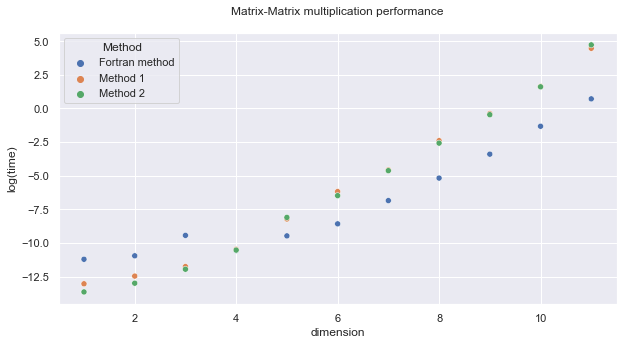

[ 1.81352798e-08 -1.90028917e-05  5.71732486e-03 -1.45998314e-01]


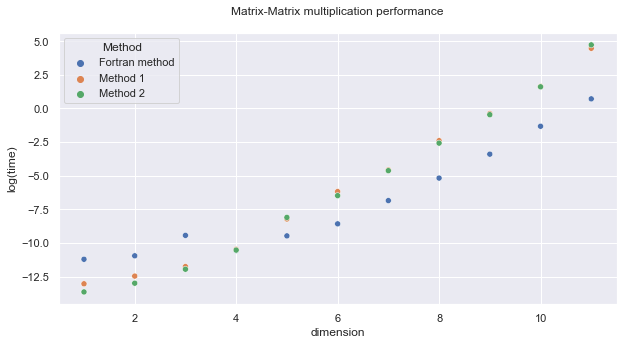

[ 2.55328351e-08 -2.95265428e-05  8.75699610e-03 -2.22880751e-01]


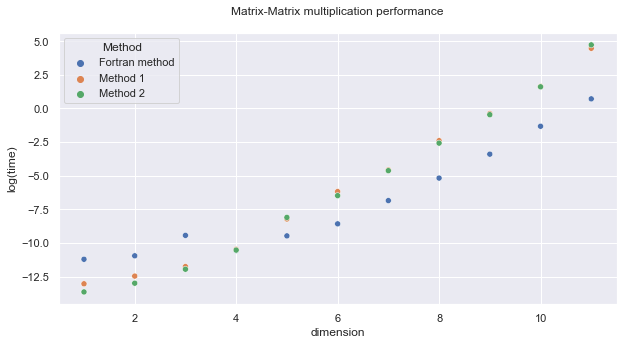

[ 2.24956498e-10  3.03027128e-08 -6.59431240e-06  3.03692594e-04]


In [6]:
print(performance_matrixProduct('','Method 1'))
print(performance_matrixProduct('','Method 2'))
print(performance_matrixProduct('','Fortran method'))

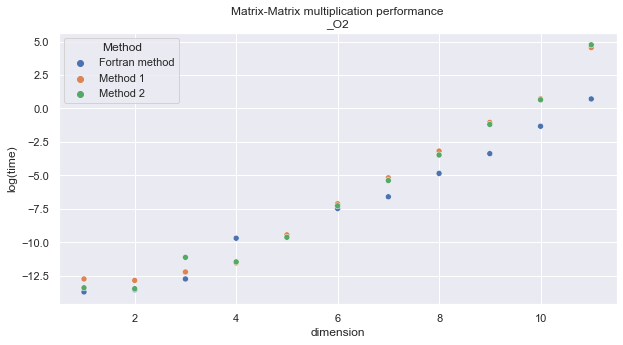

[ 2.41813958e-08 -3.17156235e-05  9.57590358e-03 -2.45602519e-01]


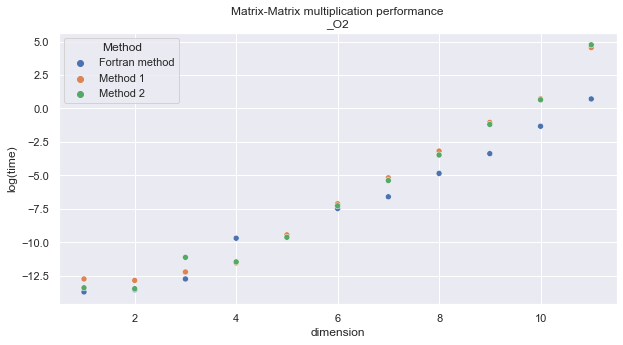

[ 3.05047656e-08 -4.07815406e-05  1.21980564e-02 -3.11819023e-01]


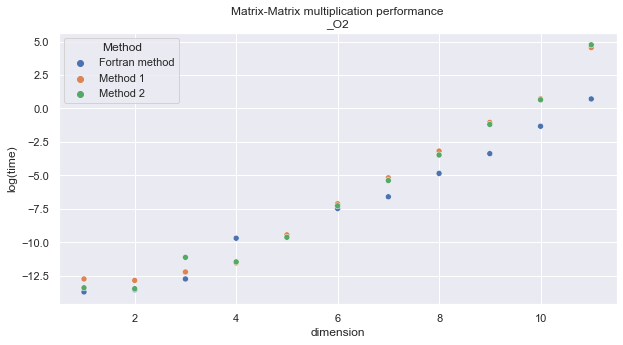

[2.28674162e-10 1.39772146e-08 2.73215438e-06 1.67806083e-04]


In [7]:
print(performance_matrixProduct('_O2','Method 1'))
print(performance_matrixProduct('_O2','Method 2'))
print(performance_matrixProduct('_O2','Fortran method'))

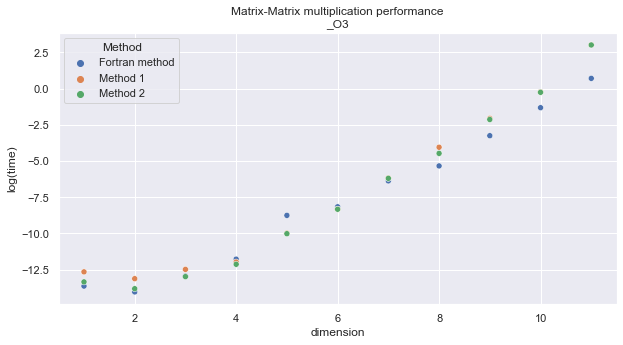

[ 4.79506097e-09 -5.81252109e-06  1.77918127e-03 -4.57961865e-02]


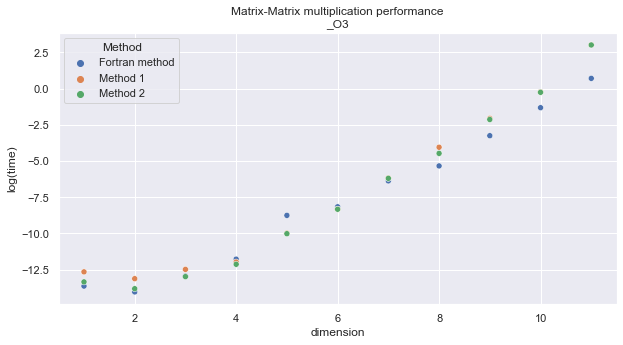

[ 4.75425861e-09 -5.75261823e-06  1.74160765e-03 -4.48320488e-02]


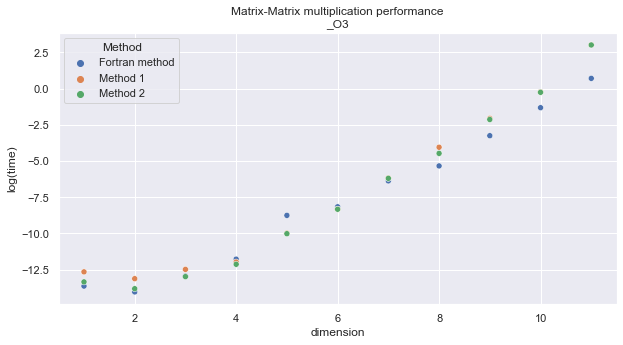

[ 2.23046086e-10  2.24317209e-08  3.83290662e-06 -6.38133585e-05]


In [8]:
print(performance_matrixProduct('_O3','Method 1'))
print(performance_matrixProduct('_O3','Method 2'))
print(performance_matrixProduct('_O3','Fortran method'))

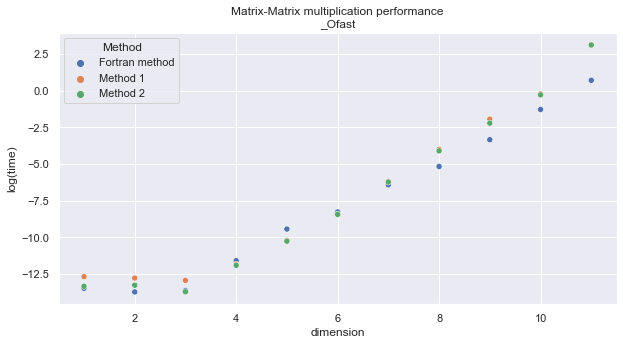

[ 5.47809574e-09 -6.79026171e-06  2.09496878e-03 -5.41996719e-02]


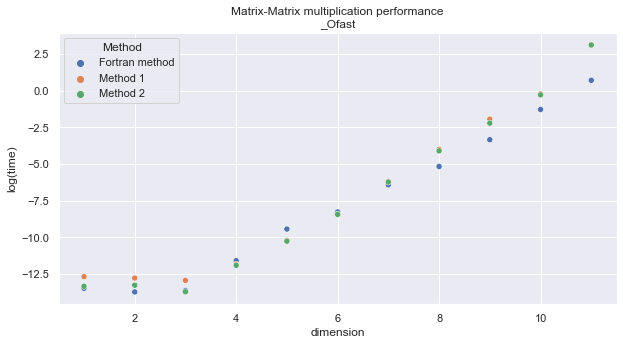

[ 5.46799935e-09 -6.78535879e-06  2.04395121e-03 -5.21989901e-02]


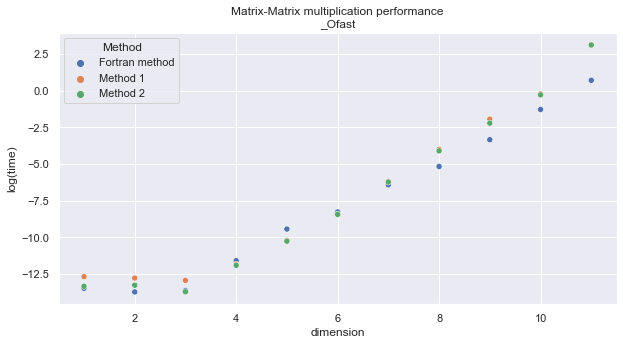

[ 2.07447645e-10  6.78255027e-08 -1.67885489e-05  5.81007824e-04]


In [9]:
print(performance_matrixProduct('_Ofast','Method 1'))
print(performance_matrixProduct('_Ofast','Method 2'))
print(performance_matrixProduct('_Ofast','Fortran method'))